In [1]:
import pandas as pd

In [2]:
df_ride = pd.read_csv("rides.csv")

In [4]:
df_ride.head(5)

,ride_id,user_id,start_station_id,end_station_id,start_time,end_time,distance_km
0,1,542,17,5,2024-03-25 10:06:00,2024-03-25 10:24:55.074889,3.78
1,2,804,2,23,2024-02-05 16:53:00,2024-02-05 17:01:49.215435,1.76
2,3,328,13,23,2024-08-27 04:46:00,2024-08-27 05:00:10.059262,2.83
3,4,52,22,2,2024-01-03 00:39:00,2024-01-03 01:17:10.690811,7.64
4,5,449,23,10,2024-01-29 17:22:00,2024-01-29 18:28:32.193009,13.31


In [5]:
df_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ride_id           15000 non-null  int64  
 1   user_id           15000 non-null  int64  
 2   start_station_id  15000 non-null  int64  
 3   end_station_id    15000 non-null  int64  
 4   start_time        15000 non-null  object 
 5   end_time          15000 non-null  object 
 6   distance_km       15000 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 820.4+ KB


In [6]:
df_ride["start_time"] = pd.to_datetime(df_ride["start_time"])
df_ride["end_time"] = pd.to_datetime(df_ride["end_time"])

In [7]:
df_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ride_id           15000 non-null  int64         
 1   user_id           15000 non-null  int64         
 2   start_station_id  15000 non-null  int64         
 3   end_station_id    15000 non-null  int64         
 4   start_time        15000 non-null  datetime64[ns]
 5   end_time          15000 non-null  datetime64[ns]
 6   distance_km       15000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4)
memory usage: 820.4 KB


In [8]:
df_ride["ride_duration_min"] = (
    (df_ride["end_time"] - df_ride["start_time"])
    .dt.total_seconds() / 60
)

In [9]:
df_ride[["ride_duration_min", "distance_km"]].describe()

,ride_duration_min,distance_km
count,15000.000000,15000.000000
mean,29.241893,5.848410
std,15.589161,3.117811
min,0.000762,0.000000
25%,16.317999,3.260000
50%,27.121548,5.420000
75%,40.578576,8.120000
max,96.865426,19.370000


In [10]:
df_ride.head(10)

,ride_id,user_id,start_station_id,end_station_id,start_time,end_time,distance_km,ride_duration_min
0,1,542,17,5,2024-03-25 10:06:00,2024-03-25 10:24:55.074889,3.78,18.917915
1,2,804,2,23,2024-02-05 16:53:00,2024-02-05 17:01:49.215435,1.76,8.820257
2,3,328,13,23,2024-08-27 04:46:00,2024-08-27 05:00:10.059262,2.83,14.167654
3,4,52,22,2,2024-01-03 00:39:00,2024-01-03 01:17:10.690811,7.64,38.178180
4,5,449,23,10,2024-01-29 17:22:00,2024-01-29 18:28:32.193009,13.31,66.536550
5,6,400,3,23,2024-07-16 15:04:00,2024-07-16 15:17:43.137128,2.74,13.718952
6,7,938,9,21,2024-06-25 10:18:00,2024-06-25 11:12:32.758482,10.91,54.545975
7,8,457,11,22,2024-10-14 13:12:00,2024-10-14 13:24:25.018144,2.48,12.416969
8,9,985,14,21,2024-10-21 12:35:00,2024-10-21 13:03:59.693859,5.80,28.994898
9,10,315,20,13,2024-06-18 12:03:00,2024-06-18 12:46:13.807639,8.65,43.230127


In [11]:
df_ride.isnull().sum()
df_ride.duplicated().sum()

0

In [12]:
false_starts = df_ride[
    (df_ride["distance_km"] == 0) &
    (df_ride["ride_duration_min"] == 0)
]

In [13]:
false_starts.shape[0]

0

In [14]:
df_ride[["distance_km", "ride_duration_min"]].describe()

,distance_km,ride_duration_min
count,15000.000000,15000.000000
mean,5.848410,29.241893
std,3.117811,15.589161
min,0.000000,0.000762
25%,3.260000,16.317999
50%,5.420000,27.121548
75%,8.120000,40.578576
max,19.370000,96.865426


In [15]:
zero_distance = df_ride[df_ride["distance_km"] == 0]
zero_distance.shape[0]

1

In [16]:
zero_distance.head()

,ride_id,user_id,start_station_id,end_station_id,start_time,end_time,distance_km,ride_duration_min
10018,10019,463,19,14,2024-10-03 13:07:00,2024-10-03 13:07:00.045719,0.0,0.000762


In [17]:
df_ride_clean = df_ride[df_ride["distance_km"] > 0]

In [18]:
df_ride_clean[["distance_km", "ride_duration_min"]].describe()

,distance_km,ride_duration_min
count,14999.000000,14999.000000
mean,5.848800,29.243842
std,3.117549,15.587852
min,0.010000,0.034543
25%,3.260000,16.318794
50%,5.420000,27.121988
75%,8.120000,40.579657
max,19.370000,96.865426


In [19]:
zero_distance = df_ride[df_ride["distance_km"] == 0.5]
zero_distance.shape[0]

3

In [20]:
zero_distance.head()

,ride_id,user_id,start_station_id,end_station_id,start_time,end_time,distance_km,ride_duration_min
1948,1949,179,1,19,2024-12-16 17:40:00,2024-12-16 17:42:29.300560,0.5,2.488343
12493,12494,463,5,1,2024-04-05 16:00:00,2024-04-05 16:02:30.053092,0.5,2.500885
14058,14059,418,8,15,2024-08-18 07:51:00,2024-08-18 07:53:30.598823,0.5,2.509980


In [22]:
df_stations = pd.read_csv("stations.csv")

In [24]:
df_stations

,station_id,station_name,capacity,lat,lon
0,1,Megan Manors St,10,46.728847,43.737302
1,2,Ryan Islands St,30,-86.964204,20.624754
2,3,Fisher Stravenue St,20,-66.690303,25.872797
3,4,Jimenez Summit St,20,72.592864,-167.735942
4,5,Taylor Fall St,10,35.634175,2.486946
5,6,Richard Haven St,20,28.204957,-50.958117
6,7,Nancy Spring St,10,53.490127,162.203124
7,8,Jennifer Land St,20,-73.007552,117.625279
8,9,Rhonda Ports St,20,-20.632055,-115.649575
9,10,Brown Shoal St,50,-1.755094,-114.944076


In [25]:
df_users = pd.read_csv("users.csv")

In [26]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           1000 non-null   int64 
 1   username          1000 non-null   object
 2   age               1000 non-null   int64 
 3   membership_level  1000 non-null   object
 4   created_at        1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [28]:
df_users.head(5)

,user_id,username,age,membership_level,created_at
0,1,enewman,33,Casual,2024-03-25
1,2,oliverdaniel,28,Casual,2025-01-20
2,3,pmartinez,35,Casual,2024-11-20
3,4,joseph98,42,Casual,2024-11-08
4,5,xstrong,28,Casual,2024-03-07


In [29]:
df_users["created_at"] = pd.to_datetime(df_users["created_at"])

In [31]:
df_users[["age"]].describe()

,age
count,1000.000000
mean,29.856000
std,7.466526
min,18.000000
25%,24.000000
50%,30.000000
75%,35.000000
max,60.000000


# Visualizations

## Peak Time 

In [35]:
df_ride["start_hour"] = df_ride["start_time"].dt.hour

In [36]:
hourly_usage = (
    df_ride
    .groupby("start_hour")["ride_id"]
    .count()
    .reset_index(name="ride_count")
    .sort_values("start_hour")
)

In [37]:
hourly_usage

,start_hour,ride_count
0,0,106
1,1,112
2,2,94
3,3,67
4,4,166
5,5,408
6,6,838
7,7,1213
8,8,989
9,9,635


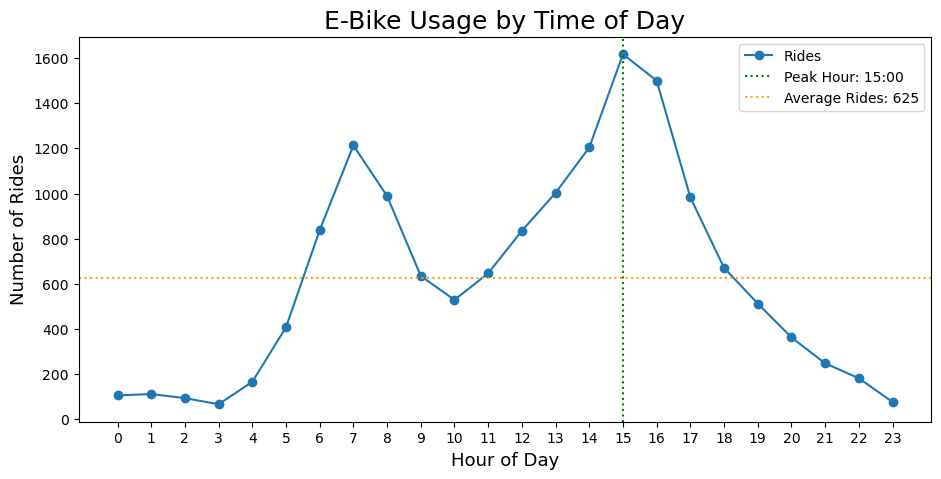

In [70]:
peak_hour = hourly_usage.loc[hourly_usage["ride_count"].idxmax(), "start_hour"]
avg_count = hourly_usage["ride_count"].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(11, 5))
plt.plot(hourly_usage["start_hour"], hourly_usage["ride_count"], marker="o", label="Rides")

# Vertical line for peak hour
plt.axvline(x=peak_hour, color='green', linestyle=':', label=f'Peak Hour: {peak_hour}:00')

# Horizontal line for average ride count
plt.axhline(y=avg_count, color='orange', linestyle=':', label=f'Average Rides: {avg_count:.0f}')

plt.xticks(range(0, 24))
plt.xlabel("Hour of Day", fontsize=13)
plt.ylabel("Number of Rides", fontsize=13)
plt.title("E-Bike Usage by Time of Day", fontsize=18)
plt.legend()
plt.show()

## Ride Duration by Membership

In [71]:
df_ride_users = df_ride.merge(df_users, on="user_id", how="left")

In [72]:
df_ride_users.head(10)

,ride_id,user_id,start_station_id,end_station_id,start_time,end_time,distance_km,ride_duration_min,start_hour,username,age,membership_level,created_at
0,1,542,17,5,2024-03-25 10:06:00,2024-03-25 10:24:55.074889,3.78,18.917915,10,jennifer98,20,Casual,2024-11-27
1,2,804,2,23,2024-02-05 16:53:00,2024-02-05 17:01:49.215435,1.76,8.820257,16,hbruce,26,Casual,2024-09-11
2,3,328,13,23,2024-08-27 04:46:00,2024-08-27 05:00:10.059262,2.83,14.167654,4,andreabauer,36,Subscriber,2024-03-10
3,4,52,22,2,2024-01-03 00:39:00,2024-01-03 01:17:10.690811,7.64,38.178180,0,owilkins,26,Casual,2024-12-17
4,5,449,23,10,2024-01-29 17:22:00,2024-01-29 18:28:32.193009,13.31,66.536550,17,donald21,25,Casual,2024-12-15
5,6,400,3,23,2024-07-16 15:04:00,2024-07-16 15:17:43.137128,2.74,13.718952,15,vfaulkner,39,Subscriber,2024-07-28
6,7,938,9,21,2024-06-25 10:18:00,2024-06-25 11:12:32.758482,10.91,54.545975,10,xaviervalenzuela,35,Casual,2024-12-13
7,8,457,11,22,2024-10-14 13:12:00,2024-10-14 13:24:25.018144,2.48,12.416969,13,andrea32,29,Subscriber,2024-11-17
8,9,985,14,21,2024-10-21 12:35:00,2024-10-21 13:03:59.693859,5.80,28.994898,12,lsalazar,29,Subscriber,2024-12-23
9,10,315,20,13,2024-06-18 12:03:00,2024-06-18 12:46:13.807639,8.65,43.230127,12,qaguirre,40,Casual,2024-10-26


In [73]:
bins = [0, 15, 30, float('inf')]
labels = ['Short', 'Medium', 'Long']

df_ride_users['trip_type'] = pd.cut(df_ride_users['ride_duration_min'], bins=bins, labels=labels)

In [74]:
df_ride_users[['ride_duration_min', 'trip_type']].head(10)

,ride_duration_min,trip_type
0,18.917915,Medium
1,8.820257,Short
2,14.167654,Short
3,38.178180,Long
4,66.536550,Long
5,13.718952,Short
6,54.545975,Long
7,12.416969,Short
8,28.994898,Medium
9,43.230127,Long


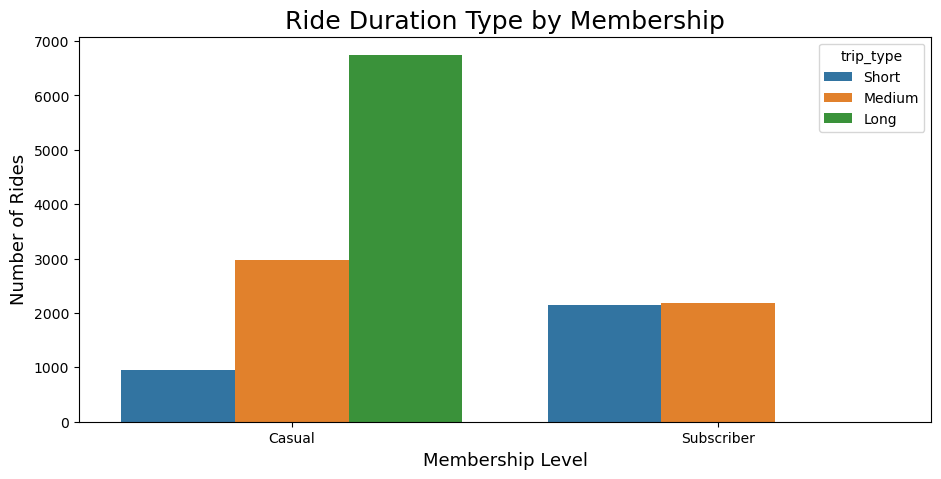

In [80]:
import seaborn as sns

plt.figure(figsize=(11,5))
sns.countplot(data=df_ride_users, x='membership_level', hue='trip_type')
plt.xlabel("Membership Level", fontsize=13)
plt.ylabel("Number of Rides", fontsize=13)
plt.title("Ride Duration Type by Membership", fontsize=18)
plt.show()

## Net Flow

In [90]:
departures = df_ride.groupby("start_station_id")["ride_id"].count().rename("total_departures")

arrivals = df_ride.groupby("end_station_id")["ride_id"].count().rename("total_arrivals")

In [92]:
station_flow = df_stations.copy() 

# Merge departures
station_flow = station_flow.merge(departures, left_on="station_id", right_index=True, how="left")

# Merge arrivals
station_flow = station_flow.merge(arrivals, left_on="station_id", right_index=True, how="left")

In [93]:
station_flow["total_departures"] = station_flow["total_departures"].fillna(0).astype(int)
station_flow["total_arrivals"] = station_flow["total_arrivals"].fillna(0).astype(int)

In [94]:
station_flow["net_flow"] = station_flow["total_arrivals"] - station_flow["total_departures"]

In [96]:
# Top sinks (more arrivals)
station_flow.sort_values("net_flow", ascending=False).head(10)


,station_id,station_name,capacity,lat,lon,total_departures,total_arrivals,net_flow
24,25,Amy Park St,10,37.622695,123.233438,559,625,66
3,4,Jimenez Summit St,20,72.592864,-167.735942,609,659,50
5,6,Richard Haven St,20,28.204957,-50.958117,581,629,48
11,12,Espinoza Pines St,10,24.657822,5.129388,594,636,42
10,11,Andrew Ranch St,20,82.949883,74.563919,560,596,36
16,17,Edwards Drive St,50,-84.151334,-109.394362,583,612,29
4,5,Taylor Fall St,10,35.634175,2.486946,565,593,28
21,22,Bell Villages St,10,29.692242,-147.702565,602,626,24
13,14,Krystal Village St,20,34.249372,-149.047073,586,601,15
12,13,Stephanie Summit St,30,81.383664,-76.086270,570,583,13


In [97]:
# Top sources (more departures)
station_flow.sort_values("net_flow").head(10)

,station_id,station_name,capacity,lat,lon,total_departures,total_arrivals,net_flow
7,8,Jennifer Land St,20,-73.007552,117.625279,648,582,-66
18,19,King Harbors St,30,-85.020499,-92.769207,634,578,-56
15,16,Smith Light St,10,15.494495,-139.192788,615,562,-53
22,23,Michael Shores St,10,75.494271,173.564126,608,561,-47
0,1,Megan Manors St,10,46.728847,43.737302,634,588,-46
6,7,Nancy Spring St,10,53.490127,162.203124,596,561,-35
20,21,Harper Well St,50,-17.238544,-28.704659,628,605,-23
14,15,Samuel Manor St,30,-21.513012,59.745410,607,594,-13
8,9,Rhonda Ports St,20,-20.632055,-115.649575,627,617,-10
17,18,Christine Orchard St,30,14.517564,148.189213,592,583,-9


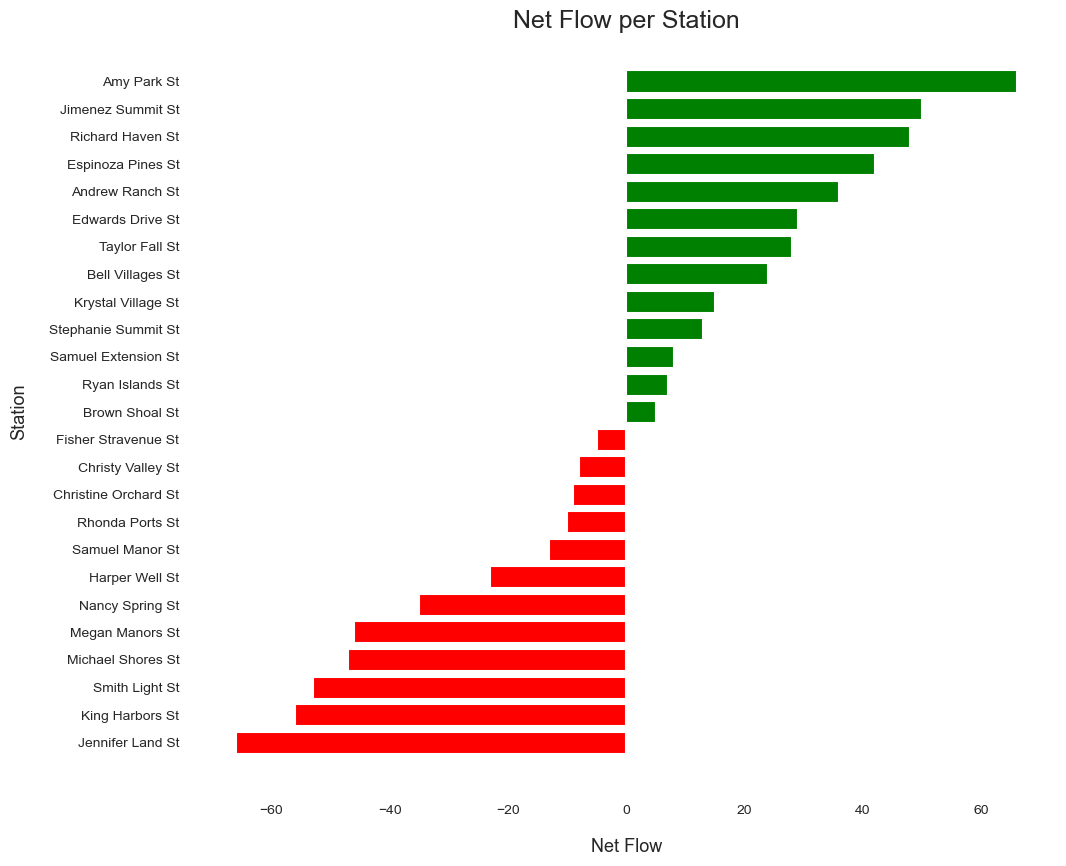

In [170]:
import matplotlib.pyplot as plt

station_flow_sorted = station_flow.sort_values("net_flow")
colors = station_flow_sorted["net_flow"].apply(lambda x: 'green' if x>0 else 'red')

plt.figure(figsize=(11,9))
ax = plt.gca()

plt.barh(station_flow_sorted["station_name"], station_flow_sorted["net_flow"], color=colors)

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove grid lines
ax.grid(False)

# Remove tick marks
ax.tick_params(left=False, bottom=False)

# Labels and title
plt.xlabel("Net Flow", fontsize=13, labelpad=15)
plt.ylabel("Station", fontsize=13, labelpad=15)
plt.title("Net Flow per Station", fontsize=18)

# Adjust font size for y-ticks only (station names)
ax.tick_params(axis='y', labelsize=10)

# For x-axis (flow values), just adjust label size via tick_params
ax.tick_params(axis='x', labelsize=10)

plt.tight_layout()
plt.show()


## User Retention

In [129]:
df_users.head(5)

,user_id,username,age,membership_level,created_at
0,1,enewman,33,Casual,2024-03-25
1,2,oliverdaniel,28,Casual,2025-01-20
2,3,pmartinez,35,Casual,2024-11-20
3,4,joseph98,42,Casual,2024-11-08
4,5,xstrong,28,Casual,2024-03-07


In [130]:
df_users['signup_month'] = df_users['created_at'].dt.to_period('M')

In [131]:
monthly_users = df_users.groupby('signup_month')['user_id'].count().reset_index()
monthly_users.rename(columns={'user_id': 'new_users'}, inplace=True)

In [132]:
monthly_users['prev_month_new_users'] = monthly_users['new_users'].shift(1)

In [133]:
monthly_users['mom_growth'] = (monthly_users['new_users'] - monthly_users['prev_month_new_users']) / monthly_users['prev_month_new_users'] * 100

In [134]:
monthly_users.fillna(0, inplace=True) 
monthly_users

,signup_month,new_users,prev_month_new_users,mom_growth
0,2024-01,26,0.0,0.000000
1,2024-02,83,26.0,219.230769
2,2024-03,74,83.0,-10.843373
3,2024-04,79,74.0,6.756757
4,2024-05,97,79.0,22.784810
5,2024-06,89,97.0,-8.247423
6,2024-07,72,89.0,-19.101124
7,2024-08,87,72.0,20.833333
8,2024-09,85,87.0,-2.298851
9,2024-10,76,85.0,-10.588235


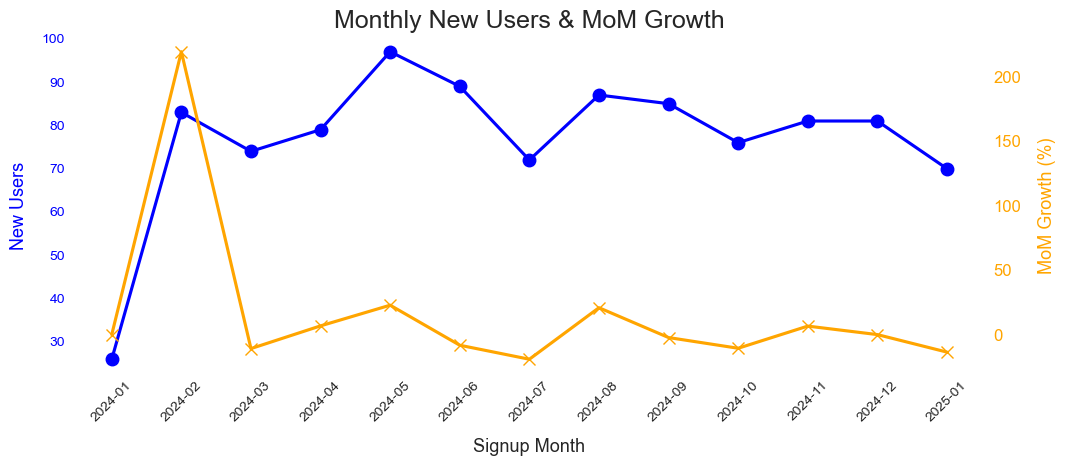

In [148]:
fig, ax1 = plt.subplots(figsize=(11,5))

ax1.plot(
    monthly_users['signup_month'].astype(str),
    monthly_users['new_users'],
    marker='o', color='blue', label='New Users'
)
ax1.set_xlabel('Signup Month', fontsize=13, labelpad=10)
ax1.set_ylabel('New Users', color='blue', fontsize=13, labelpad=10)

ax1.tick_params(axis='y', labelcolor='blue', length=0, labelsize=10)  
ax1.tick_params(axis='x', rotation=45, length=0, labelsize=10)         

# Remove all spines for ax1
for spine in ax1.spines.values():
    spine.set_visible(False)

# Remove grid
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(
    monthly_users['signup_month'].astype(str),
    monthly_users['mom_growth'],
    marker='x', color='orange', label='MoM Growth (%)'
)
ax2.set_ylabel('MoM Growth (%)', color='orange', fontsize=13, labelpad=12)
ax2.tick_params(axis='y', labelcolor='orange', length=0, labelsize=12)  # smaller font

# Remove all spines for ax2
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.grid(False)

# Title
plt.title('Monthly New Users & MoM Growth', fontsize=18)

# Tight layout
fig.tight_layout()
plt.show()
